<a href="https://colab.research.google.com/github/palak-26/Unemployment_Rate_Analysis/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing First DataSet

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Unemployment in India.csv to Unemployment in India.csv


In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install scikit-learn
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df=pd.read_csv('Unemployment in India.csv');

In [ ]:
# Removing rows with missing values
df_cleaned = df.dropna()

# Displaying the DataFrame after removing missing values
print("\nDataFrame after removing rows with missing values:")
print(df_cleaned)


DataFrame after removing rows with missing values:
             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
749     West Bengal   29-02-2020    Monthly                              7.55   
750     West Bengal   31-03-2020    Monthly                              6.67   
751     West Bengal   30-04-2020    Monthly                             15.63   
752     West Bengal   31-05-2020    Monthly                             15.22   
753     West Bengal   30-06-2020    Monthly              

In [ ]:
df_cleaned

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [ ]:
df_cleaned.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df_cleaned.columns= ["States", "Date", "Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate", "Region"]

In [ ]:
df_cleaned['States'].value_counts().idxmax()

'Andhra Pradesh'

In [ ]:
df_cleaned['States'].value_counts().idxmin()

'Chandigarh'

In [ ]:
import datetime as dt

df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'],dayfirst=True)
df_cleaned['month_int']= df_cleaned['Date'].dt.month
df_cleaned['month']=df_cleaned['month_int'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
df_cleaned

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,month_int,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep
...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2,Feb
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,3,Mar
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,4,Apr
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,5,May


Data Visualization

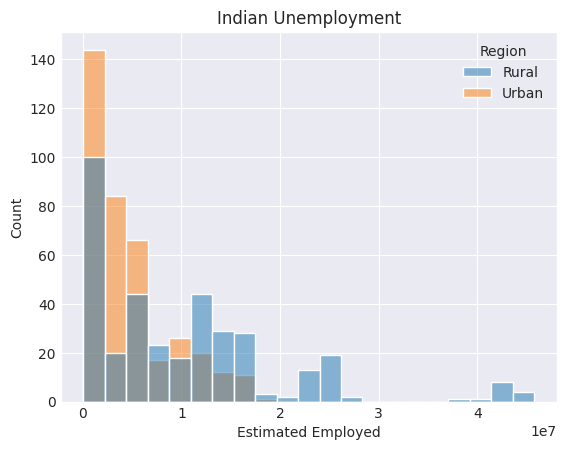

In [ ]:
df_cleaned.columns= ["States", "Date", "Frequency","Estimated Unemployment Rate", "Estimated Employed", "Estimated Labour Participation Rate", "Region","month_int","month"]

plt.title("Indian Unemployment")

sns.histplot(x="Estimated Employed", hue="Region", data=df_cleaned)

plt.show()

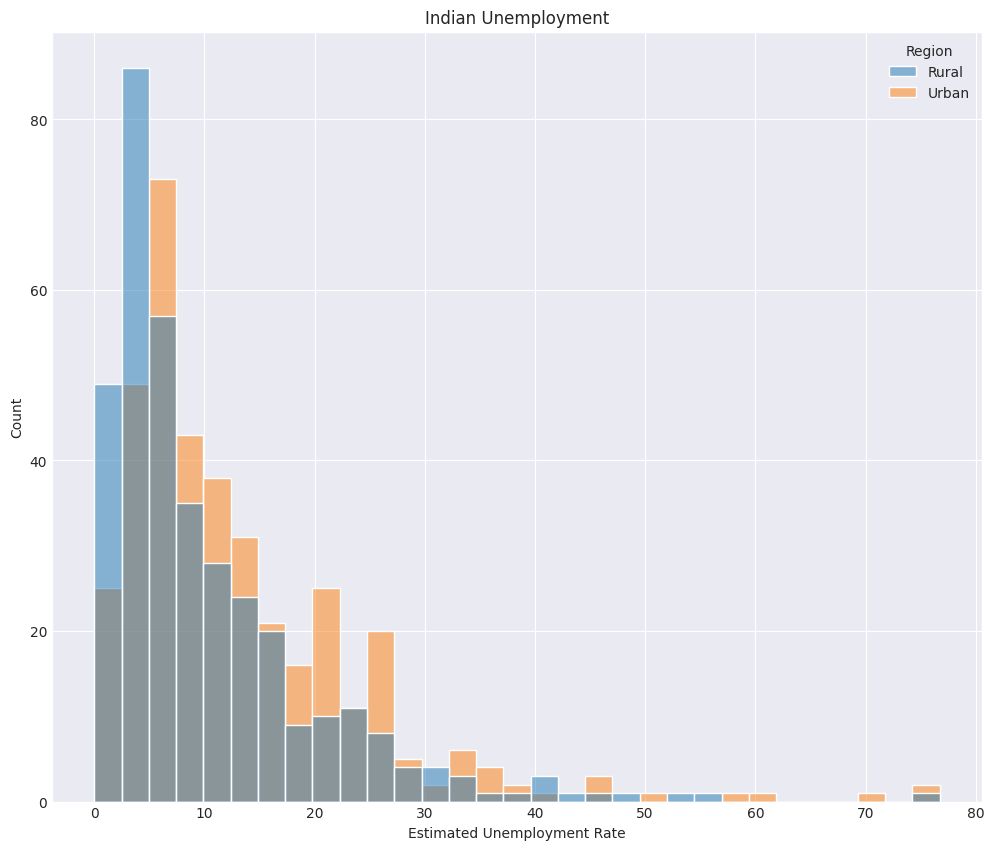

In [ ]:
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")

sns.histplot (x="Estimated Unemployment Rate", hue="Region", data= df_cleaned)

plt.show()

In [ ]:
df_cleaned['year'] = df_cleaned['Date'].dt.year

years=df_cleaned["year"].unique().tolist()

months=df_cleaned["month"].unique().tolist()

index = []

values = []

for year in years:
    for month in months:
        # Check if data exists for the year-month combination before appending
        if not df_cleaned[(df_cleaned["year"] == year) & (df_cleaned["month"]== month)].empty:
            values.append(df_cleaned[(df_cleaned["year"] == year) & (df_cleaned["month"] == month)] \
                          [["Estimated Unemployment Rate","Estimated Labour Participation Rate"]].corr()\
                          .loc["Estimated Unemployment Rate", "Estimated Labour Participation Rate"])
            index.append(f"{month}-{year}")

corr= pd.Series(values, index).sort_index()

corr

,0
Apr-2020,0.227706
Aug-2019,0.138757
Dec-2019,0.208831
Feb-2020,0.332930
Jan-2020,0.287383
Jul-2019,0.071682
Jun-2019,0.312750
Jun-2020,0.077158
Mar-2020,0.152453
May-2019,0.332917


[]

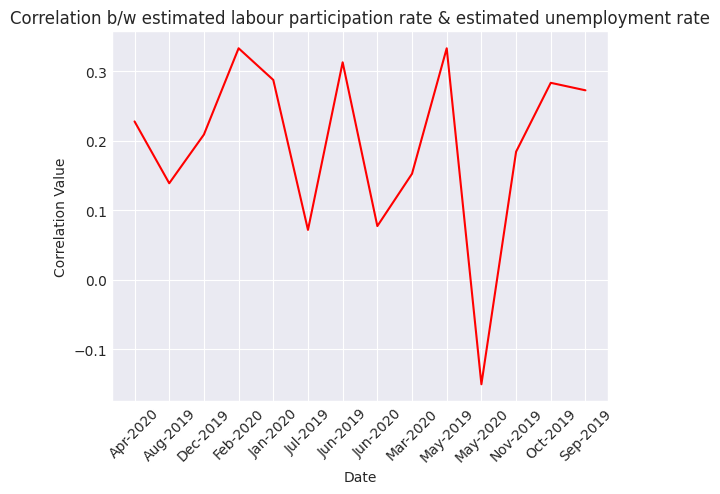

In [ ]:
sns.set_style("darkgrid")

sns.lineplot(corr, color="red")

plt.xlabel("Date")

plt.ylabel("Correlation Value")

plt.title("Correlation b/w estimated labour participation rate & estimated unemployment rate")

plt.xticks (rotation=45)

plt.plot()

Dashboard

In [ ]:
unemploment = df_cleaned [["States", "Region", "Estimated Unemployment Rate"]]

figure= px.sunburst (unemploment, path=["Region", "States"], values ="Estimated Unemployment Rate", width=700, height=700, color_continuous_scale="RdYlGn", title="Unemployment Rate in India")

figure.show()

In [ ]:
X = df_cleaned.select_dtypes(include=['float', 'int'])
y = df_cleaned['Estimated Unemployment Rate']

model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train])
    score = model.score(X.iloc[test,:], y.iloc[test])
    scores.append(score)

print(scores)


[1.0, 1.0, 1.0]


In [ ]:
print(df_cleaned.columns)

X = df_cleaned[["States", "Date", "Frequency","Estimated Unemployment Rate", "Estimated Employed", "Estimated Labour Participation Rate", "Region","month_int","month"]]
y = df_cleaned['Estimated Unemployment Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'month_int', 'month', 'year'],
      dtype='object')


Analyzing Second DataSet

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving futureJob_Prediction.zip to futureJob_Prediction.zip


In [ ]:
df=pd.read_csv('futureJob_Prediction.zip');

In [ ]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


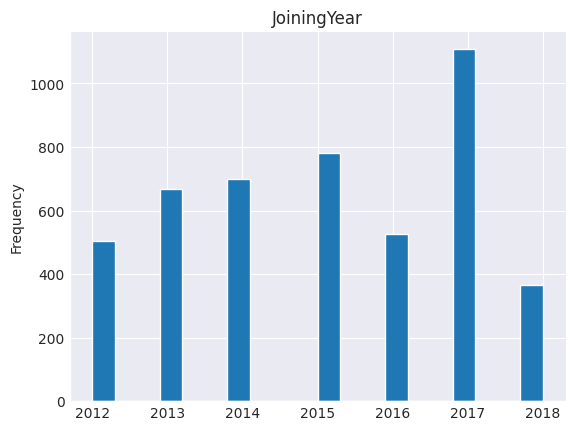

In [ ]:
from matplotlib import pyplot as plt
df['JoiningYear'].plot(kind='hist', bins=20, title='JoiningYear')
plt.gca().spines[['top', 'right',]].set_visible(False)

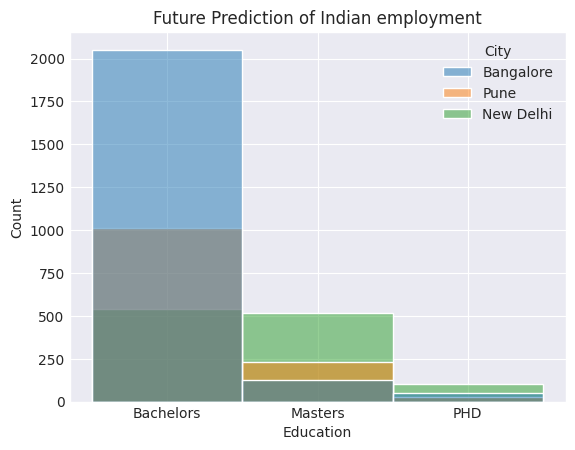

In [ ]:
df.columns= ["Education", "JoiningYear", "City","PaymentTier", "Age", "Gender", "EverBenched","ExperienceInCurrentDomain","LeaveOrNot"]

plt.title("Future Prediction of Indian employment")

sns.histplot(x="Education", hue="City", data=df)

plt.show()

In [ ]:
unemploment = df[["City", "PaymentTier", "LeaveOrNot"]]

figure= px.sunburst (unemploment, path=["PaymentTier", "City"], values ="LeaveOrNot", width=700, height=700, color_continuous_scale="RdYlGn", title="Future Prediction of Employment in India")

figure.show()

SOLUTION

In [ ]:
X = df.select_dtypes(include=['float', 'int'])
y = df['LeaveOrNot']

model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train])
    score = model.score(X.iloc[test,:], y.iloc[test])
    scores.append(score)

print(scores)


[1.0, 1.0, 1.0]


In [ ]:
print(df.columns)

X = df.select_dtypes(include=['float', 'int'])
y = df['LeaveOrNot']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')


In [ ]:
X = df_cleaned.select_dtypes(include=['float', 'int'])
y = df_cleaned['Estimated Unemployment Rate']

model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train])
    score = model.score(X.iloc[test,:], y.iloc[test])
    scores.append(score)

print(scores)


[1.0, 1.0, 1.0]


In [ ]:
print(df_cleaned.columns)

X = df_cleaned[["States", "Date", "Frequency","Estimated Unemployment Rate", "Estimated Employed", "Estimated Labour Participation Rate", "Region","month_int","month"]]
y = df_cleaned['Estimated Unemployment Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'month_int', 'month', 'year'],
      dtype='object')
